In [2]:
import sys
sys.path.insert(0, r"C:\Users\Malac\ownCloud\Github\mydatapreprocessing")

# Mydatapreprocessing

## Data load, consolidation, conversion a preprocessing

## Installation and import

    pip install mydatapreprocessing

There are some extra libraries that may be necessary for some functionality (h5 and parquet). If import error, install library. If you want to install all extra libraries at once, download [requirements](https://github.com/Malachov/mydatapreprocessing/blob/master/requirements_advanced.txt) and install all with

    pip install -r requirements_advanced.txt

In [3]:
import mydatapreprocessing as mdp

## Load data from web

Possible formats

- csv
- xls, xlsx
- json
- h5
- parquet

+ python (list, dictionary, numpy.ndarray, pandas.DataFrame)

In [8]:
data_loaded = mdp.load_data.load_data("https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.json", request_datatype_suffix=".json", predicted_table='data', data_orientation="index")
print(data_loaded.head())

# Save it just for another examples of loading from disk
data_loaded.to_csv("tested_data.csv", index=False)
data_loaded.to_csv("tested_data2.csv", index=False)

       0
0  -0.12
1  -0.09
2  -0.10
3  -0.18
4  -0.27


## Load data from disk

<AxesSubplot:>

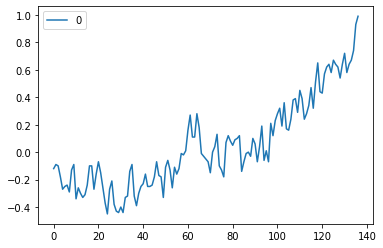

In [5]:
data = mdp.load_data.load_data(r"tested_data.csv")  # If necessary edit csv_style={'sep': ';', 'decimal': ','}, header=6
data.plot()

## Load more data files at once

### Get list of paths

You can select data simply with dialog window

Uncomment line to try it out

In [11]:
paths = ["tested_data.csv", "tested_data2.csv"]
# paths = mdp.load_data.get_file_paths()
paths

['tested_data.csv', 'tested_data2.csv']

In [12]:
data = mdp.load_data.load_data(paths, csv_style={'sep': ';', 'decimal': ','}, header=6)
# Length is twice as long as two files was used
data

## Consolidation

Remove NaN values, resample or do string embedding

In [14]:
data = mdp.load_data.load_data(r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
data = mdp.preprocessing.data_consolidation(data, datetime_column='Date', freq='M', dtype='float32')
data

,Temp
Date,
1981-01-31,549.099976
1981-02-28,495.000000
1981-03-31,418.500000
1981-04-30,370.700012
1981-05-31,294.200012
...,...
1990-08-31,242.600006
1990-09-30,275.000000
1990-10-31,351.700012


## Format conversion

Because data are consolidated (everytime in the same format), it's very simple to convert it to any format.


In [15]:
parquet_converted = data.to_parquet('data.parquet')

## Preprocessing

Functions for smoothing, standardization, outliers removal etc...


# Mydatapreprocessing
## [Dokumentace](https://mydatapreprocessing.readthedocs.io/)
## [Repo](https://github.com/Malachov/mydatapreprocessing)